In [1]:
import pysm
from pysm.nominal import models
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
total = sky.signal()(353)

In [59]:
factor300=pysm.common.convert_units('K_RJ','K_CMB',353.)

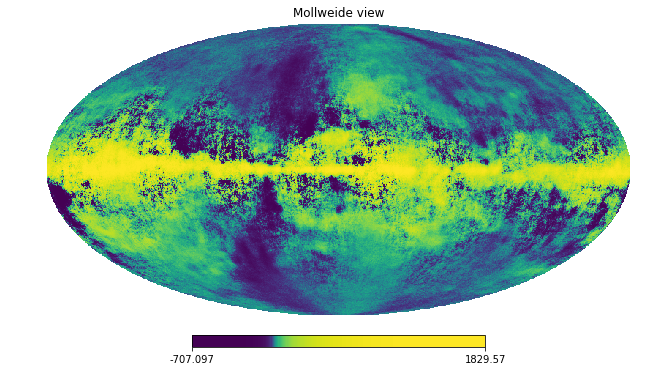

In [63]:
hp.mollview(total[1]*factor300, norm = 'hist')

# 

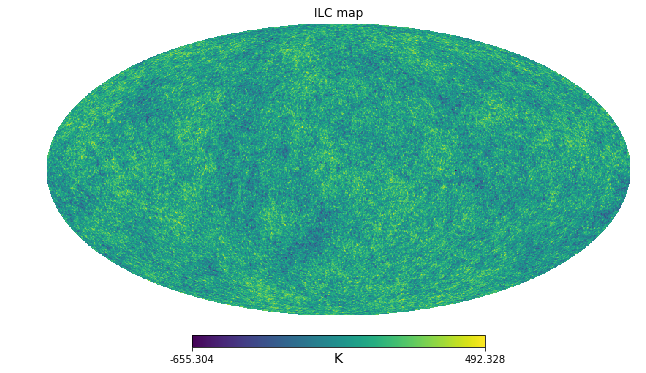

In [2]:
nside = 512

sky_config = {
        'dust' : models("d1",nside),
        'synchrotron' : models("s1",nside),
        'ame' : models("a1",nside),
        'freefree' : models("f1",nside),
        'cmb' : models("c1",nside),
}

sky=pysm.Sky(sky_config)

tot50=sky.signal()(50.)
tot70=sky.signal()(70.)
tot90=sky.signal()(90.)
tot110=sky.signal()(110.)
tot130=sky.signal()(130.)
tot150=sky.signal()(150.)
tot300=sky.signal()(300.)

factor50=pysm.common.convert_units('K_RJ','K_CMB',50.)
factor70=pysm.common.convert_units('K_RJ','K_CMB',70.)
factor90=pysm.common.convert_units('K_RJ','K_CMB',90.)
factor110=pysm.common.convert_units('K_RJ','K_CMB',110.)
factor130=pysm.common.convert_units('K_RJ','K_CMB',130.)
factor150=pysm.common.convert_units('K_RJ','K_CMB',150.)
factor300=pysm.common.convert_units('K_RJ','K_CMB',300.)

factor=[factor50,factor70,factor90,factor110,factor130,factor150,factor300]

tot50=np.delete(tot50,[1,2],axis=0)
tot70=np.delete(tot70,[1,2],axis=0)
tot90=np.delete(tot90,[1,2],axis=0)
tot110=np.delete(tot110,[1,2],axis=0)
tot130=np.delete(tot130,[1,2],axis=0)
tot150=np.delete(tot150,[1,2],axis=0)
tot300=np.delete(tot300,[1,2],axis=0)

tot=np.concatenate((tot50,tot70,tot90,tot110,tot130,tot150,tot300),axis=0)

for i in range(tot.shape[0]):
    for j in range(tot.shape[1]):
        tot[i][j]*=factor[i]

cij=np.zeros((tot.shape[0],tot.shape[0]))

for i in range(tot.shape[0]):
    for j in range(tot.shape[0]):
        for pix in range(tot.shape[1]):
            cij[i][j]+=tot[i][pix]*tot[j][pix]

cij=cij/tot.shape[1]

if np.linalg.det(cij) > 0.0000001:
    cij_inv=np.linalg.inv(cij)
else:
    cij_inv=np.linalg.pinv(cij)
        
cij_inv_sum=0.
w=np.zeros((tot.shape[0],))

for i in range(tot.shape[0]):
    for j in range(tot.shape[0]):
        cij_inv_sum+=cij_inv[i][j]
        w[i]+=cij_inv[i][j]

w=w/cij_inv_sum
T=np.zeros((tot.shape[1],))

for i in range(tot.shape[0]):
    T=T+w[i]*tot[i]
    
hp.mollview(T,unit='K',title='ILC map')

cmb=sky.cmb(nu=90.)
for i in range(cmb[0].shape[0]):
    cmb[0][i]=cmb[0][i]*factor90
cl=hp.anafast(cmb[0])
cl_ILC=hp.anafast(T)

for l in range(cl_ILC.shape[0]):
    cl_ILC[l]=cl_ILC[l]*l*(l+1)/(2*np.pi)
    cl[l]=cl[l]*l*(l+1)/(2*np.pi)
    
l=range(cl.shape[0])


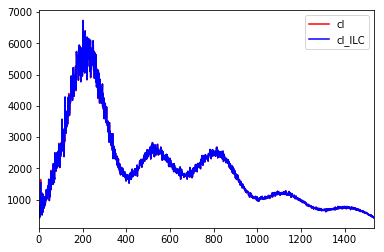

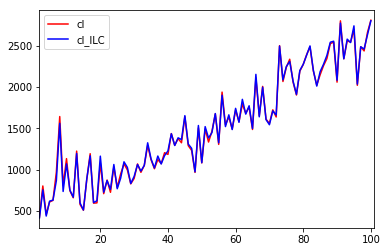

In [3]:
plt.figure(1)
plt.plot(l[2:],cl[2:],c='r',label='cl')
plt.plot(l[2:],cl_ILC[2:],c='b',label='cl_ILC')
plt.xlim((2,cl.shape[0]-1))   
plt.legend()  

plt.figure(2)
plt.plot(l[2:101],cl[2:101],c='r',label='cl')
plt.plot(l[2:101],cl_ILC[2:101],c='b',label='cl_ILC')
plt.xlim((2,101))   
plt.legend()

In [13]:
L = 1500; Q = int(L/10.0); Ell = np.ones(Q)
def bin_l(cl):
    if len(cl.shape) > 2 :
        bin_averages = np.zeros((Q, cl.shape[1], cl.shape[1]))
    else:
        bin_averages = np.zeros(Q)
#     for l in range(L):
#         cl[l] = l*(l+1)/2/np.pi*(cl[l])    
    for q in range(Q):
        bin_averages[q] = (sum(cl[q*L//Q:((q+1)*L//Q)]/(L//Q)))
    return bin_averages

for i in range(0,int(Q)):
    Ell[i] = (2*i+1)*L//Q/2 

In [14]:
cl_ILC_bin = bin_l(cl_ILC);
cl_bin = bin_l(cl)

(-1, 2)

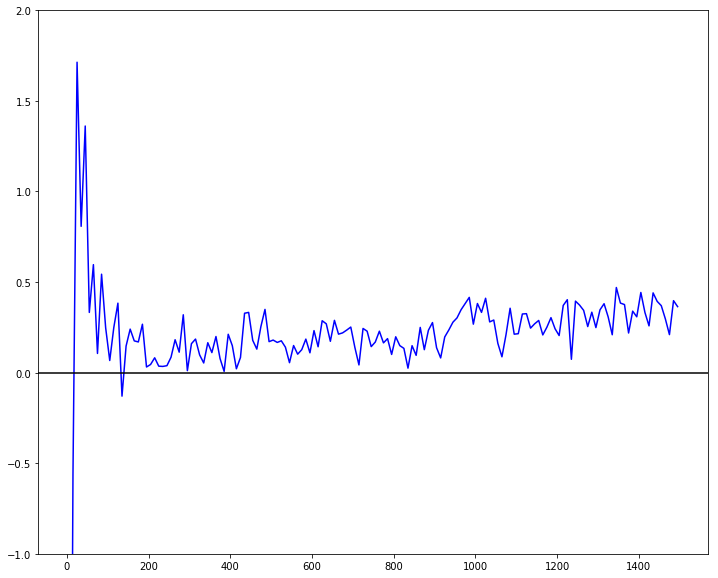

In [21]:
plt.figure(figsize = (12,10))
plt.plot(Ell,(cl_ILC_bin - cl_bin)*100.0/cl_bin,c='b',label='cl_ILC')
plt.axhline(0,color = 'k')
plt.ylim(-1, 2)

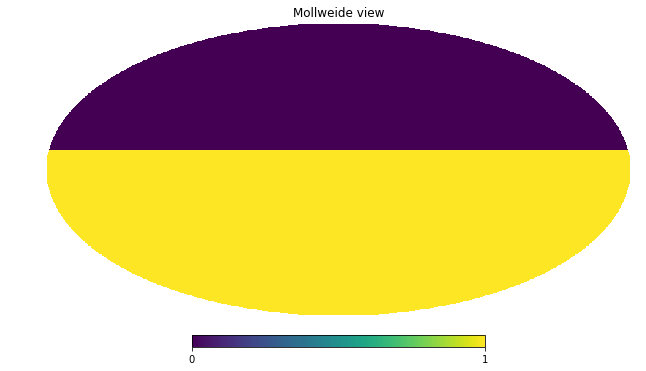

In [34]:
mask_none = np.arange(hp.nside2npix(nside))
l_deg_min = 80; l_deg_max = 80;  # latitude
my_mask = (np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0] ) #+ (hp.pix2ang(nside, mask_none)[0] < np.radians(l_deg_min))
hp.mollview(my_mask)

In [35]:
w

array([   0.63946091,   -6.86528847,  -11.38705862,   88.11449401,
       -111.75187733,   42.37836059,   -0.12809108])

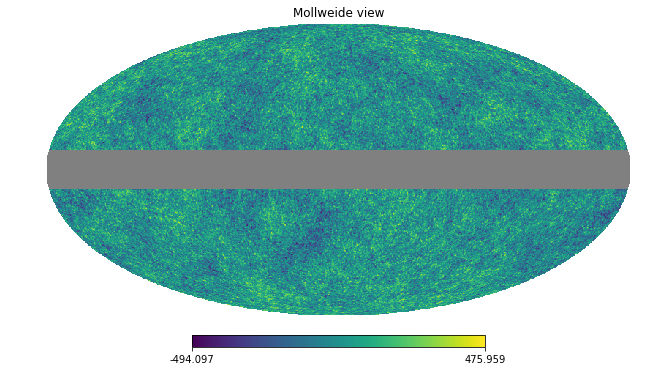

In [32]:
T_mask = hp.ma(T)
T_mask.mask = np.logical_not(my_mask)
hp.mollview(T_mask)

In [81]:
a = np.linspace(0.00001, 1, 100)
y =  0.01*1/a**2 + 0.7*a**2 #+ 0.29*1/a

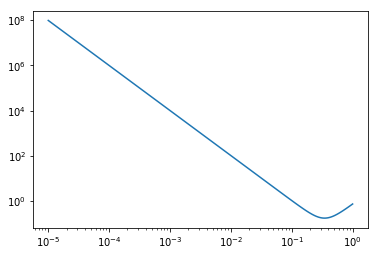

In [82]:
plt.loglog(a, y)